# Import Libraries

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
from datetime import datetime
from sklearn import preprocessing
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
%matplotlib inline

# Import Data

In [2]:
filename = 'building1retail.csv'
df = pd.read_csv(filename, index_col=[0], 
                 date_parser=lambda x: datetime.strptime(x, "%m/%d/%Y %H:%M"))
df.head()

,OAT (F),Power (kW)
Timestamp,,
2010-01-01 01:15:00,51,165.1
2010-01-01 01:30:00,51,151.6
2010-01-01 01:45:00,51,146.9
2010-01-01 02:00:00,51,153.7
2010-01-01 02:15:00,51,153.8


# Plot Data

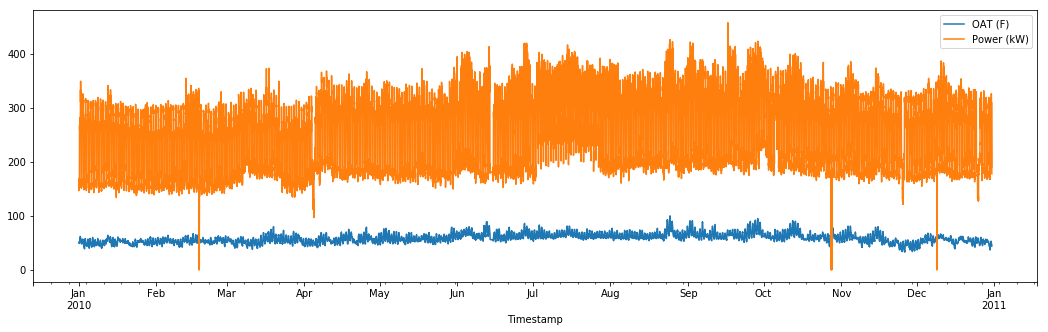

In [3]:
df.plot(figsize=(18,5))

# Check for missing data

In [4]:
df.isnull().values.any()

False

# Distribution of data

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11b0af6d8>,
      dtype=object)

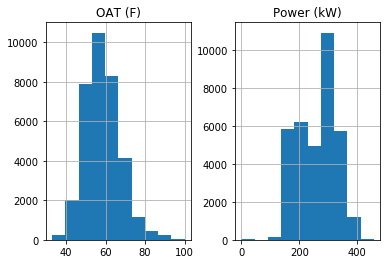

In [5]:
df.hist()

# Remove outliers

In [6]:
std_dev = 3
df_new = df[(np.abs(stats.zscore(df)) < float(std_dev)).all(axis=1)]

# Plot cleaned data

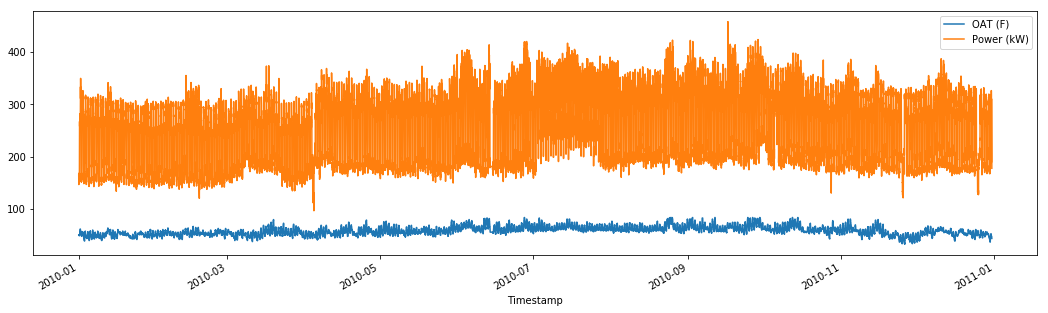

In [7]:
df_new.plot(figsize=(18,5))

# Validate linear relationship

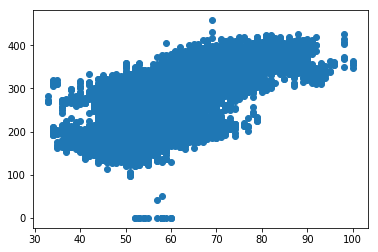

In [8]:
plt.scatter(df['OAT (F)'], df['Power (kW)'])

# Plot a day picked at random

Thursday


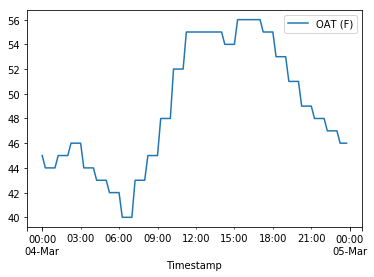

In [9]:
df.loc['2010-03-04', ['OAT (F)']].plot()

# Prints the day
print(df.loc['2010-03-04'].index.day_name()[0])

Thursday


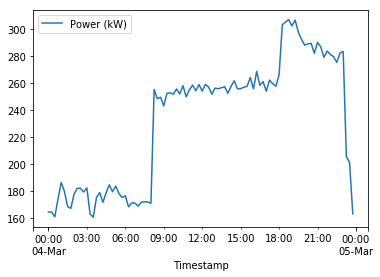

In [10]:
df.loc['2010-03-04', ['Power (kW)']].plot()
print(df.loc['2010-03-04'].index.day_name()[0])

# Fit Data to Linear Regression

In [11]:
X = pd.DataFrame(df['OAT (F)'])
y = pd.DataFrame(df['Power (kW)'])

model = LinearRegression()
scores = []
kfold = KFold(n_splits=3, shuffle=True, random_state=42)
for i, (train, test) in enumerate(kfold.split(X, y)):
    model.fit(X.iloc[train,:], y.iloc[train,:])
    score = model.score(X.iloc[test,:], y.iloc[test,:])
    scores.append(score)

print(scores)

[0.38433441420926373, 0.393859332700643, 0.4015006377550042]


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/base.py:485: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  linalg.lstsq(X, y)


# Add time of day

In [12]:
X = pd.DataFrame(df['OAT (F)'])

var = 'tod'
X[var] = X.index.hour

# drop_first = True removes multi-collinearity
add_var = pd.get_dummies(X[var], prefix=var, drop_first=True)

# Add all the columns to the model data
X = X.join(add_var)

# Drop the original column that was expanded
X.drop(columns=[var], inplace=True)

X.head()

,OAT (F),tod_1,tod_2,tod_3,tod_4,tod_5,tod_6,tod_7,tod_8,tod_9,...,tod_14,tod_15,tod_16,tod_17,tod_18,tod_19,tod_20,tod_21,tod_22,tod_23
Timestamp,,,,,,,,,,,,,,,,,,,,,
2010-01-01 01:15:00,51,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2010-01-01 01:30:00,51,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2010-01-01 01:45:00,51,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2010-01-01 02:00:00,51,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2010-01-01 02:15:00,51,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Fit Data to Multiple Regression

In [13]:
y = pd.DataFrame(df['Power (kW)'])

model = LinearRegression()
scores = []
kfold = KFold(n_splits=3, shuffle=True, random_state=42)
for i, (train, test) in enumerate(kfold.split(X, y)):
    model.fit(X.iloc[train,:], y.iloc[train,:])
    scores.append(model.score(X.iloc[test,:], y.iloc[test,:]))

print(scores)

[0.7985456090772198, 0.813413396839006, 0.8161753266832902]
